In [1]:
import pandas as pd
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

  ### Preprocessing

In [2]:
# Load data
file_path = Path("emp_data_encoded.csv")
loans_df = pd.read_csv(file_path)
loans_df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  \
0                   3              0     1                      0   
1                   6              0     1                      0   
2                   4              0     1                      0   
3                   5              0     1                      0   
4                   3              0     1                      0   

   Department_IT  Department_RandD  ...  Department_hr  Department_management  \
0              0                 0  ...              0                      0   
1              0                 0  ...              0                      0   
2              0                 0  ...              0                      0   
3              0                 0  ...              0                      0   
4              0                 0  ...              0                      0   

   Department_marketing  Department_product_mng  Department_sales  \
0                     0                       0                 1   
1                     0                       0                 1   
2                     0                       0                 1   
3                     0                       0                 1   
4                     0                       0                 1   

   Department_support  Department_technical  salary_high  salary_low  \
0                   0                     0            0           1   
1                   0                     0            0           0   
2                   0                     0            0           0   
3                   0                     0            0           1   
4                   0                     0            0           1   

   salary_medium  
0              0  
1              1  
2              1  
3              0  
4              0  

[5 rows x 21 columns]

In [3]:
# Define features set
X = loans_df.copy()
X.drop("left", axis=1, inplace=True)
X.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  promotion_last_5years  Department_IT  \
0                   3              0                      0              0   
1                   6              0                      0              0   
2                   4              0                      0              0   
3                   5              0                      0              0   
4                   3              0                      0              0   

   Department_RandD  Department_accounting  Department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   

   Department_management  Department_marketing  Department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   

   Department_sales  Department_support  Department_technical  salary_high  \
0                 1                   0                     0            0   
1                 1                   0                     0            0   
2                 1                   0                     0            0   
3                 1                   0                     0            0   
4                 1                   0                     0            0   

   salary_low  salary_medium  
0           1              0  
1           0              1  
2           0              1  
3           1              0  
4           1              0

In [4]:
# Define target vector
y = loans_df["left"].values.reshape(-1, 1)
y[:5]

array([[1],
       [1],
       [1],
       [1],
       [1]])

In [5]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

  ### Create Gradient Boosting Classifier

In [19]:
# Choose a learning rate and create classifier
classifier = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.75,
    max_features=5,
    max_depth=3,
    random_state=0
)

# Fit the model
classifier.fit(X_train_scaled, y_train.ravel())

# Make Prediction
predictions = classifier.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()}).head(20)

Prediction  Actual
0            0       0
1            0       0
2            1       1
3            0       0
4            0       0
5            1       1
6            0       0
7            0       0
8            1       1
9            1       1
10           0       0
11           1       1
12           1       1
13           1       1
14           0       0
15           1       1
16           0       0
17           0       0
18           1       1
19           0       0

  ### Evaluate the model

In [20]:
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.9749333333333333


In [21]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"],
    columns=["Predicted 0", "Predicted 1"]
)

# Displaying results
display(cm_df)

Predicted 0  Predicted 1
Actual 0         2814           50
Actual 1           44          842

In [22]:
# Generate classification report
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2864
           1       0.94      0.95      0.95       886

    accuracy                           0.97      3750
   macro avg       0.96      0.97      0.97      3750
weighted avg       0.97      0.97      0.97      3750



In [23]:
# Random Forests in sklearn will automatically calculate feature importance
importances = classifier.feature_importances_

In [24]:
# Sort the features by their importance
sorted(zip(classifier.feature_importances_, X.columns), reverse=True)

[(0.49466289259724355, 'satisfaction_level'),
 (0.1775536419428883, 'time_spend_company'),
 (0.14739944757608517, 'average_montly_hours'),
 (0.10665582405354003, 'number_project'),
 (0.05163895815094102, 'last_evaluation'),
 (0.010238796447069874, 'Work_accident'),
 (0.006054620010439793, 'salary_low'),
 (0.0012579786730052343, 'salary_medium'),
 (0.0011904728357319033, 'salary_high'),
 (0.0007368510809300557, 'Department_support'),
 (0.0005913658827111992, 'Department_technical'),
 (0.00048618467119354727, 'Department_hr'),
 (0.0004022700569391304, 'Department_product_mng'),
 (0.0002825305351263626, 'Department_RandD'),
 (0.00022813963899249616, 'Department_accounting'),
 (0.00019234914571709727, 'Department_IT'),
 (0.00016233559929814661, 'Department_sales'),
 (0.00013149085140800207, 'Department_management'),
 (7.031990136684205e-05, 'promotion_last_5years'),
 (6.353034937230707e-05, 'Department_marketing')]

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

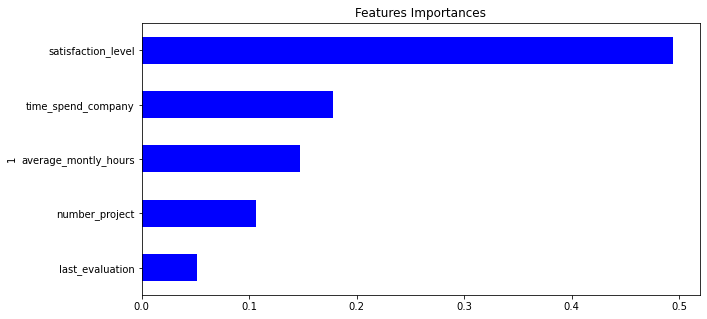

In [32]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(classifier.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances').tail(5)
importances_sorted.plot(kind='barh', color='blue', title= 'Features Importances', legend=False, figsize=(10,5))